<h1 align="center"><b>Trabalho 02 – Privacidade Diferencial Mecanismos Laplace & Exponencial<b></h1>
<h1 align="center">
    <a href="https://si3.ufc.br/sigaa/portais/discente/discente.jsf">Davi Oliveira Lopes - Matrícula: 543049</a>
</h1>
<h1 align="center">
    <a href="https://cc.ufc.br/curso/corpo-docente/javam-machado/"> Professor: Javam Machado</a>
</h1>

<a href="https://github.com/daviolp/Trabalho_Privacidade_Diferencial_RSI">
<img src="https://img.shields.io/static/v1?label=GitHub&message=daviolp&color=7159c1&style=for-the-badge&logo=ghost"/>

### ***Importações***

In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt

### ***Carregando Dataset***

In [25]:
df = pd.read_csv('covid.csv', sep=';', delimiter=None,).drop(['Unnamed: 0'], axis=1)
df.head(3)

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo


### ***Quantidade Total de Registros***

In [26]:
print('------------------------------------|')
print(f'Total de Exames no Dataset: {df.shape[0]}--|')
print('------------------------------------|')

------------------------------------|
Total de Exames no Dataset: 879543--|
------------------------------------|


### ***Cálculo da Data de Nascimento***

In [27]:
df['Nascimento'] = pd.to_datetime(df['Nascimento'], errors = 'coerce')
df['Nascimento'] = pd.to_datetime(df['Nascimento'], format='%Y-%m-%d')

### ***Criação da Coluna 'Idade'***

In [28]:
data_atual = pd.to_datetime('2022-09-22',  format='%Y-%m-%d')
df['idade'] = (data_atual.year - df['Nascimento'].dt.year) - ((data_atual.month - df['Nascimento'].dt.month) < 0)

In [29]:
df = df.query('idade < 122')

In [30]:
df.head(3)

,Identificador,CodigoMunicipio,Municipio,Estado,Genero,Nascimento,ResultadoExame,idade
0,c3ba634113e4b5eb0e3eaae93b09759b,231290.0,SOBRAL,CE,MASCULINO,2003-08-14,Negativo,19.0
1,ac84809bfc89b992a0a0221e50b135c0,230960.0,PACAJUS,CE,MASCULINO,1983-11-07,Negativo,38.0
2,28ccfaa0c53b792cd1ffa0b7e535f617,230523.0,HORIZONTE,CE,FEMININO,1982-01-14,Negativo,40.0


# ***1.1 Mecanismo de Laplace***
<h3 align="left">
<b><span style="color:green">Q1: Média da Idade dos Indivíduos Representados no Dataset</span></b>
</h3>

In [31]:
f_d_linha = (df['idade'].sum() - df['idade']) / (df.shape[0] - 1)
f_d = df['idade'].mean()
delta_f = abs(f_d - f_d_linha.min())
budget = [0.1, 0.5, 1.0, 10.0]

rui = []
ori = []
for valor in budget:
    b = delta_f / valor
    ruido = np.random.laplace(loc=0, scale=b)
    ori.append(f_d)
    rui.append(f_d + ruido)
    print(delta_f, ruido, f_d + ruido, f_d)

8.931494397756978e-05 0.0012958651605845123 41.449963726461704 41.44866786130112
8.931494397756978e-05 -3.0833624581386625e-05 41.44863702767654 41.44866786130112
8.931494397756978e-05 -1.1612890830212145e-05 41.44865624841029 41.44866786130112
8.931494397756978e-05 1.8622005319773267e-05 41.44868648330644 41.44866786130112


<h3 align="left">
<b><span style="color:blue">Gráfico de Exemplificação da Q1</span></b>
</h3>

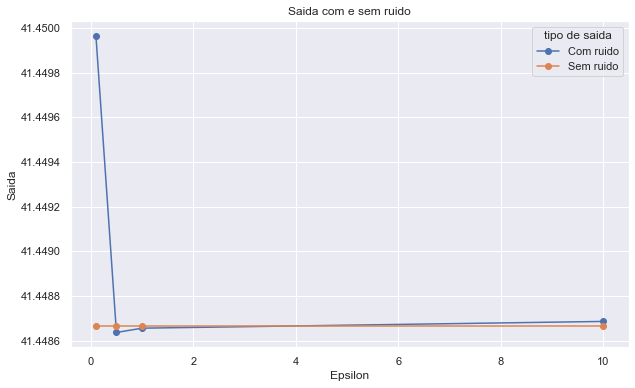

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,6))

labe = f'Com ruido'
plt.plot(budget, rui, '-o', label=labe)

labe1 = f'Sem ruido'
plt.plot(budget, ori, '-o', label=labe1)

plt.title(f'Saida com e sem ruido')
plt.legend(title='tipo de saida')
plt.xlabel('Epsilon')
plt.ylabel('Saida')
plt.show()

<h3 align="left">
<b><span style="color:green">Q2: Número de Exames Positivos</span></b>
</h3>

In [33]:
f_d = df.query('ResultadoExame == "Positivo"').shape[0]
delta_f = 1
budget = [0.1, 0.5, 1.0, 10.0] 
rui = []
ori = []

for valor in budget:
    b = delta_f / valor
    ruido = np.random.laplace(loc=0, scale=b)
    ori.append(f_d)
    rui.append(f_d + ruido)
    print(delta_f, ruido, f_d + ruido, f_d)

1 21.75530308270716 265935.7553030827 265914
1 0.39491595370377924 265914.3949159537 265914
1 -2.636222293509013 265911.3637777065 265914
1 -0.02013587792162965 265913.97986412206 265914


<h3 align="left">
<b><span style="color:blue">Gráfico de Exemplificação da Q2</span></b>
</h3>

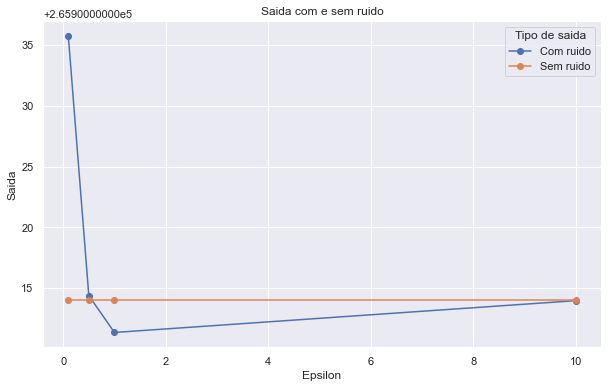

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,6))

labe = f'Com ruido'
plt.plot(budget, rui, '-o', label=labe)

labe1 = f'Sem ruido'
plt.plot(budget, ori, '-o', label=labe1)

plt.title(f'Saida com e sem ruido')
plt.legend(title='Tipo de saida')
plt.xlabel('Epsilon')
plt.ylabel('Saida')
plt.show()

<h3 align="left">
<b><span style="color:green"> Q3: Total de Exames Realizados por Município</span></b>
</h3>

In [35]:
f_d = df.groupby(['Municipio']).describe()['idade']['count']
delta_f = 1
budget = [0.1, 0.5, 1.0, 10.0] 

for valor in budget:
    b = delta_f / valor
    ruido = np.random.laplace(loc=0, scale=b)
    print(f'----------------------------------------------------\n{delta_f}{ruido}{f_d + ruido}{f_d} \n----------------------------------------------------')

----------------------------------------------------
1-10.088498572732885Municipio
ABAIARA             606.911501
ACARAPE            2899.911501
ACARAU             6833.911501
ACOPIARA           3058.911501
AIUABA              380.911501
                      ...     
URUBURETAMA        1489.911501
URUOCA             1915.911501
VARJOTA            2668.911501
VARZEA ALEGRE      3234.911501
VICOSA DO CEARA    4169.911501
Name: count, Length: 184, dtype: float64Municipio
ABAIARA             617.0
ACARAPE            2910.0
ACARAU             6844.0
ACOPIARA           3069.0
AIUABA              391.0
                    ...  
URUBURETAMA        1500.0
URUOCA             1926.0
VARJOTA            2679.0
VARZEA ALEGRE      3245.0
VICOSA DO CEARA    4180.0
Name: count, Length: 184, dtype: float64 
----------------------------------------------------
----------------------------------------------------
1-1.8203112063828737Municipio
ABAIARA             615.179689
ACARAPE            2908.179689


# ***1.2 Mecanismo Exponencial***
<h3 align="left">
<b><span style="color:green">Q1: Qual o município com o menor número de casos positivos de COVID-19.</span></b>
</h3>

In [39]:
def exponential(df, opcoes, funcao_de_utilidade, sensitivity, epsilon):
    scores = [funcao_de_utilidade(df, r) for r in opcoes]
    probabilities = [np.exp(epsilon * score / (2 * sensitivity)) for score in scores]
    probabilities = probabilities / np.linalg.norm(probabilities, ord=1)
    return np.random.choice(opcoes, 1, p=probabilities)[0]

In [40]:
options = df['Municipio'].unique()

def funcao_de_utilidade(data, option):
    return data.query('ResultadoExame == "Positivo"').value_counts(['Municipio'])[option]/data.shape[0]

In [41]:
budget = [0.1, 0.5, 1.0, 10.0] 
sensitivity = 1
all_e_results = {}

for valor in budget:
    result = []
    for j in range(10):
        result.append(exponential(df, options, funcao_de_utilidade, sensitivity, valor))
    all_e_results[str(valor)] = result

In [42]:
df2 = pd.DataFrame(all_e_results)
df2

,0.1,0.5,1.0,10.0
0,MARCO,SANTANA DO CARIRI,OROS,SENADOR POMPEU
1,ACARAU,TURURU,PENAFORTE,BARREIRA
2,MORADA NOVA,MILHA,JIJOCA DE JERICOACOARA,IBARETAMA
3,SENADOR SA,TRAIRI,BARBALHA,AIUABA
4,CHOROZINHO,PACUJA,JARDIM,BARROQUINHA
5,TARRAFAS,JATI,IRACEMA,HIDROLANDIA
6,MOMBACA,ALTO SANTO,MARACANAU,LIMOEIRO DO NORTE
7,JAGUARETAMA,COREAU,JAGUARETAMA,MARANGUAPE
8,VARZEA ALEGRE,MADALENA,CAMPOS SALES,MILHA
9,GUARAMIRANGA,PIRES FERREIRA,PALHANO,GROAIRAS


Histograma para epsilon: 0.1


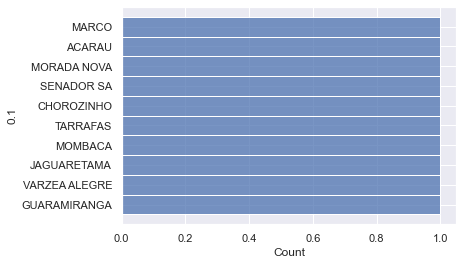

Histograma para epsilon: 0.5


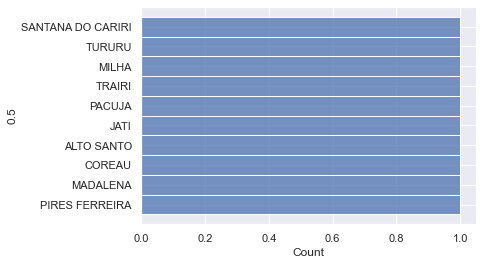

Histograma para epsilon: 1.0


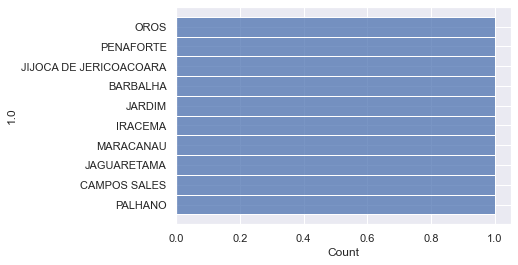

Histograma para epsilon: 10.0


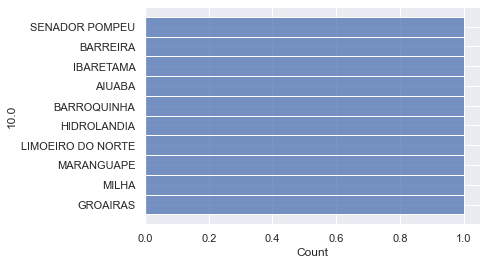

In [46]:
for inte1 in budget:
    print(f'Histograma para epsilon: {inte1}')
    sns.histplot(data=df2, y=str(inte1))
    plt.show()

In [44]:
df.query('ResultadoExame == "Positivo"').value_counts(['Municipio'])

Municipio        
FORTALEZA            52558
JUAZEIRO DO NORTE    12298
SOBRAL                9990
CRATO                 8488
MARACANAU             7273
                     ...  
AIUABA                  71
ANTONINA DO NORTE       64
ARNEIROZ                59
PENAFORTE               58
TARRAFAS                50
Length: 184, dtype: int64

<h3 align="left">
<b><span style="color:green">Q2: Qual a raça com o maior número de casos negativos de COVID-19.</span></b>
</h3>

In [45]:
budget = [0.1, 0.5, 1.0, 10.0] 
sensitivity = 1
all_e_results = {}

for valor in budget:
    result = []
    for j in range(10):
        result.append(exponential(df, options, funcao_de_utilidade, sensitivity, valor))
    all_e_results[str(valor)] = result

In [47]:
df3 = pd.DataFrame(all_e_results)
df3

,0.1,0.5,1.0,10.0
0,AURORA,IPUEIRAS,MARTINOPOLE,ANTONINA DO NORTE
1,CRATEUS,ITAPIPOCA,PACATUBA,JIJOCA DE JERICOACOARA
2,HIDROLANDIA,BATURITÉ,ITAPIPOCA,RUSSAS
3,MERUOCA,PACUJA,TRAIRI,RERIUTABA
4,PACUJA,BARBALHA,PIRES FERREIRA,ITAPAJE
5,DEPUTADO IRAPUAN PINHEIRO,ABAIARA,TAUA,JUCAS
6,FRECHEIRINHA,PENAFORTE,CAMOCIM,JATI
7,ARACATI,HORIZONTE,PORTEIRAS,CAMPOS SALES
8,FORTALEZA,BARRO,PACUJA,POTIRETAMA
9,CARIDADE,PARAIPABA,MARANGUAPE,PENAFORTE


Histograma para epsilon: 0.1


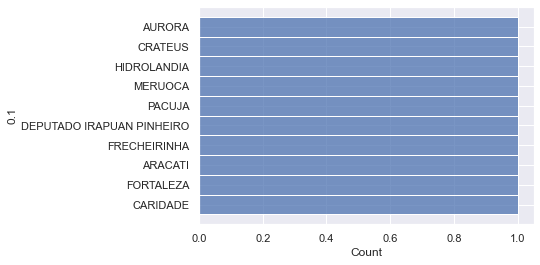

Histograma para epsilon: 0.5


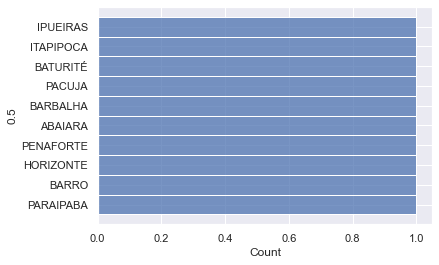

Histograma para epsilon: 1.0


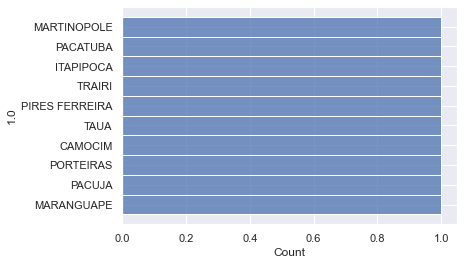

Histograma para epsilon: 10.0


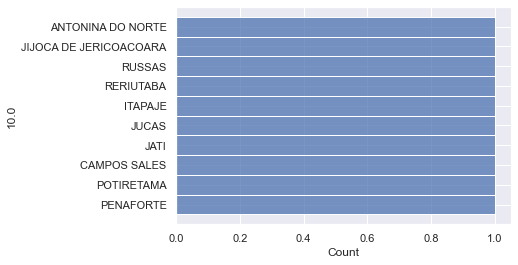

In [48]:
for inte2 in budget:
    print(f'Histograma para epsilon: {inte2}')
    sns.histplot(data=df3, y=str(inte2))
    plt.show()

In [49]:
df.query('ResultadoExame == "Negativo"').value_counts(['Genero'])

Genero   
FEMININO     310291
MASCULINO    231914
dtype: int64